##  Feature selection algorithm for building good machine learning models that don't support regularization:



We explore another data preprocessing technique that helps select relevant features from a dataset. 

Future selection is an important topic. Removing irrelevant features and noise from a dataset can help improve computational efficiency of the model. Sometimes it can even help improve the predictive power of a model, if the model suffers from overfitting.

It is desirable to have available an algorithm that automatically selects a subset of features that are most relevant to the problem. We will present a feature selection algorithm that works for machine learning models that don't support regularization such as K-nearest neighbors.


We will work with the same dataset on which we applied L1 regularization technique to zeroes out irrelevant features via logistic regression.


Data is available at: https://archive.ics.uci.edu/ml/datasets/Wine











In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load data:

df = pd.read_csv('C:/Users/uknow/Desktop/wine.data', header=None)
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins',
'Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']

df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
df.shape


(178, 14)

In [16]:
df.dtypes


Class label                       int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [7]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:,1:].values, df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(124, 13) (124,)
(54, 13) (54,)


In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) # fit only once on training data
X_test_std = sc.transform(X_test)

###  The feature selection approach:

sequential feature selection which works by removing from the full feature dataset X each feature that causes the least performance loss after its removal




### Feature selection algorithm for building good machine learning models that don't support regularization:


In [44]:
#imports
from sklearn.base import clone
from itertools import combinations


In [82]:
class FeatureSelection():
    def __init__(self, estimator, k_features, scoring=accuracy_score):
        
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.scoring = scoring

    def fit(self, X, y):  # fit() method
        dim = X_train.shape[1] #13 features
        self.indices_ = tuple(range(dim)) # tuple containing all integers from [1, 13)
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)

        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
        
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                                     X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
        
            best = np.argmax(scores) # Returns the indices of the max element
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]
    
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

### K-nearest neighbors machine learning algorithm

allows us to make predictions without any model training but with a more computationally expensive prediction ste

Steps:
Chose a distance metric. Then the algorithm finds the k samples in the training dataset that are closest in distance
(ie most similar) to the point to be classified. The class label is determined by a majority vote among its k nearest neighbors.

### Objective

By removing irrelevant features and noise from a dataset we could help improve computational efficiency of the model, but KNN algorithm doesn't support regularization. 

### Building a KNN model using the original dataset (all features):

In [84]:
knn.fit(X_train_std, y_train)
print('Training score before feature selection:', knn.score(X_train_std, y_train))
print('Test score before feature selection:', knn.score(X_test_std, y_test))

Training score before feature selection: 0.9838709677419355
Test score before feature selection: 0.9444444444444444


In [85]:
y_pred = knn.predict(X_test)
print(round(accuracy_score(y_test, y_pred),2)*100)


35.0


### Building a KNN model after feature selection using the sequential feature selection algorithm:

In [86]:
fs = FeatureSelection(knn, k_features=1)
fs.fit(X_train_std, y_train)
fs.transform(X_test)

array([[2.9 ],
       [1.36],
       [3.1 ],
       [2.78],
       [2.65],
       [5.08],
       [2.51],
       [0.92],
       [2.03],
       [1.5 ],
       [0.5 ],
       [0.34],
       [3.39],
       [3.75],
       [0.84],
       [2.26],
       [2.74],
       [3.93],
       [1.41],
       [2.99],
       [3.18],
       [2.43],
       [2.69],
       [1.92],
       [1.09],
       [2.27],
       [3.15],
       [1.69],
       [2.03],
       [0.68],
       [2.94],
       [3.  ],
       [1.75],
       [2.65],
       [2.98],
       [3.  ],
       [0.56],
       [1.46],
       [2.26],
       [0.75],
       [2.61],
       [3.25],
       [2.25],
       [1.36],
       [2.01],
       [3.03],
       [0.66],
       [2.14],
       [0.78],
       [3.14],
       [1.22],
       [0.48],
       [3.29],
       [1.31]])

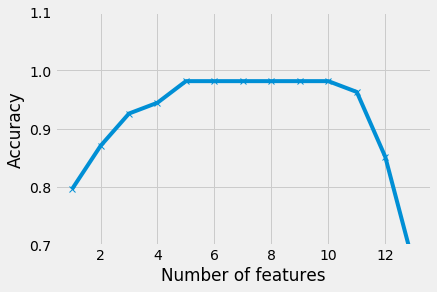

In [88]:
k_feat = [len(k) for k in fs.subsets_]
plt.plot(k_feat, fs.scores_, marker='x')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')

plt.show()

In [51]:
df.columns[1:]

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

#### Best k=5 features:

5-feature subset selected by the feature selection algorithm:

In [52]:
k=list(fs.subsets_[8]) # eliminate 8 features 
print(df.columns[1:][k])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Flavanoids',
       'Color intensity'],
      dtype='object')


In [68]:
knn.fit(X_train_std[:, k], y_train)
print('Training score after feature selection:', knn.score(X_train_std[:, k], y_train))
print('Test score after feature selection:', knn.score(X_test_std[:, k], y_test))

Training score after feature selection: 0.9435483870967742
Test score after feature selection: 0.9629629629629629


In [69]:
y_pred = knn.predict(X_test[:, k])
print(round(accuracy_score(y_test, y_pred),2)*100)

56.00000000000001


### Using feature selction lead to:

- less overfitting, reduced gap between the test and training scores 

- prediction accuracy on the test dataset has improved 
